## Questão 1

### Item 1

#### Imports

In [15]:
import cv2 as cv
import numpy as np
from os import path
from matplotlib import pyplot as plt

In [14]:
#importing images
datasetFolder = path.join('.', 'numbers_dataset')
datasetImages = ['1_1.png', '1_2.jpg','1_4.png',  '1_5.jpg',  '1_6.png',  '1.jpg']

images = [cv.imread(path.join(datasetFolder, p)) for p in datasetImages]

#### Creating chainCode function

In [3]:
def chainCode(img):

    #Converting img to grayscale
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    #thresholding img
    _, imgThresholded = cv.threshold(img, 200, 255,cv.THRESH_BINARY)

    #maybe the input image has a white background, so we need to invert the colors
    #we are assuming that the object is smaller than the background
    white_pixels,black_pixels = np.where(imgThresholded==255),np.where(imgThresholded==0)
    if len(white_pixels[0]) > len(black_pixels[0]):
        imgThresholded = cv.bitwise_not(imgThresholded)

    #dilating the object
    element = cv.getStructuringElement(shape=cv.MORPH_RECT, ksize=(3,3))
    imgDilated = cv.dilate(imgThresholded, element)

    #subtracting to only get the edges
    imgDilated = imgDilated - imgThresholded

    #finding the first white pixel
    initialPoint = np.where(imgDilated==255)
    initialPoint = (initialPoint[0][0], initialPoint[1][0])

    #deleting variables which will not be usefull anymore
    del imgThresholded, white_pixels, black_pixels
    
    ret_vec = []
    point = initialPoint
    
    dilatedCopy = np.zeros_like(imgDilated)
    while True:
        
        #verify if the right pixel is an edge 
        if imgDilated[point[0],point[1]+1] == 255:
            ret_vec.append(0)
            point = (point[0],point[1]+1)
            imgDilated[point] = 0
            dilatedCopy[point] = 180

        #verify if the below pixel is an edge
        elif imgDilated[point[0]+1,point[1]] == 255:
            ret_vec.append(6)
            point = (point[0]+1,point[1])
            imgDilated[point] = 0
            dilatedCopy[point] = 180
        

        #verify if the left pixel is an edge
        elif imgDilated[point[0],point[1]-1] == 255:
            ret_vec.append(4)
            point = (point[0],point[1]-1)
            imgDilated[point] = 0
            dilatedCopy[point] = 180

        #verify if the above pixel is an edge
        elif imgDilated[point[0]-1,point[1]] == 255:
            ret_vec.append(2)
            point = (point[0]-1,point[1])
            imgDilated[point] = 0
            dilatedCopy[point] = 180

        #verify if the right-down pixel is an edge 
        elif imgDilated[point[0]+1,point[1]+1] == 255:
            ret_vec.append(7)
            point = (point[0]+1,point[1]+1)
            imgDilated[point] = 0
            dilatedCopy[point] = 180

        #verify if the left-down pixel is an edge 
        elif imgDilated[point[0]-1,point[1]+1] == 255:
            ret_vec.append(5)
            point = (point[0]-1,point[1]+1)
            imgDilated[point] = 0
            dilatedCopy[point] = 180

        #verify if the left-up pixel is an edge 
        elif imgDilated[point[0]-1,point[1]-1] == 255:
            ret_vec.append(3)
            point = (point[0]-1,point[1]-1)
            imgDilated[point] = 0
            dilatedCopy[point] = 180

        #verify if the right-up pixel is an edge 
        elif imgDilated[point[0]-1,point[1]+1] == 255:
            ret_vec.append(1)
            point = (point[0]-1,point[1]+1)
            imgDilated[point] = 0
            dilatedCopy[point] = 180

        #cv.imshow('dilatedCopy', dilatedCopy)
        #cv.waitKey(5)

        #if we reach the initialPoint then we break    
        if point==initialPoint: break
    return ret_vec

In [12]:
cd = chainCode(images[0])
print(cd)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

### Item 2

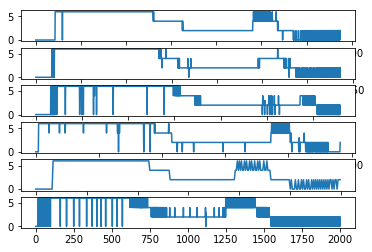

In [46]:
imagesChainCodes = [chainCode(image) for image in images]
for i,cd in enumerate(imagesChainCodes):
    plt.subplot(len(imagesChainCodes),1,i+1)
    plt.plot(imagesChainCodes[i])
plt.show()

### Item 3

In [5]:
def drawChainCode(chainCode, retImgSize=(800,640), startPixel=None):
    #Creating return image
    retImg = np.zeros((retImgSize[0], retImgSize[1]))
    
    #if no start point is defined then we set a arbitray start point
    if startPixel==None:
        #count how many times the chainCode go down, in other words, how many 6 we have
        count = len([x for x in chainCode if x==6])+20
        if count>retImgSize[0]:
            print("The figure is larger than the image, please use 'retImgSize' parameter to resize the return image.")
            return
        point = (int(retImgSize[0]-count), int(retImgSize[1]/2))
        
    else:
        point = startPixel
    
    for value in chainCode:
        if value==0:            
            point = (point[0],point[1]+1)
            retImg[point] = 255
        if value==1:            
            point = (point[0]-1,point[1]+1)
            retImg[point] = 255
        if value==2:            
            point = (point[0]-1,point[1])
            retImg[point] = 255
        if value==3:            
            point = (point[0]-1,point[1]-1)
            retImg[point] = 255
        if value==4:            
            point = (point[0],point[1]-1)
            retImg[point] = 255
        if value==5:            
            point = (point[0]-1,point[1]+1)
            retImg[point] = 255
        if value==6:            
            point = (point[0]+1,point[1])
            retImg[point] = 255
        if value==7:            
            point = (point[0]+1,point[1]+1)
            retImg[point] = 255
    return retImg

In [6]:
drawedImg = drawChainCode(cd)
cv.imshow('drawedImg', drawedImg)
cv.waitKey(0)
cv.destroyAllWindows()

### Item 4

In [58]:
def blackBoxNormalization(arrayOfCds):
    retArray = []
    
    #choose the minimum value between the arrays lengths
    normalizedArrayLength = np.min([len(array) for array in arrayOfCds])
    
    
    for array in arrayOfCds:
        if len(array)!=normalizedArrayLength:
            arrayLen = len(array) #get the current array length
            step = arrayLen/normalizedArrayLength #find the step

            normalizedArray = []
            normalizedArray.append(array[0]) #append the firts value
            idx,aux = 0,0.0
            
            for x in range(normalizedArrayLength-1):
                aux +=step
                a = int(aux)
                idx+=a
                aux -= a
                if idx > arrayLen-1:
                    break
                else:
                    normalizedArray.append(array[idx])
            
            retArray.append(normalizedArray)
        else:
            retArray.append(array)
    return retArray

In [59]:
normalizedArrayOfCds = blackBoxNormalization(imagesChainCodes)
print(([len(x) for x in normalizedArrayOfCds]))

300
[300, 300, 300, 300, 300, 300]
